Name-  Aastha Kundra

PGID-  12310022

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.manifold import MDS
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import LabelEncoder

In [6]:
import os
print(os.getcwd())

C:\Users\aasth\Downloads


In [7]:
os.chdir(r'C:\Users\aasth\Downloads')

### PROBLEM 1

Data set link :  tmnst DATA SET.csv               

This dataset contains 26 characters in different fonts. 

•	We will work with all the 26 capital letters A to Z. 

•	Normalize each pixel value from [0,1] range instead of [0,255] now. 

•	Please split each class into 70% train and 30% test split 



In [8]:
tmnst = pd.read_csv('tmnst DATA SET.csv')

In [9]:
tmnst.shape

(74724, 785)

In [10]:
tmnst.head()

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
labels = tmnst['labels']
pixels = tmnst.drop(columns=['labels'])

In [12]:
pixels_normalized = pixels / 255.0

In [13]:
X_train, X_test, y_train, y_test = [], [], [], []

In [14]:
for label in labels.unique():
    # Select images and labels corresponding to the current class
    class_indices = labels[labels == label].index
    X_class = pixels_normalized.loc[class_indices]
    y_class = labels.loc[class_indices]
    
    # Split the class into train and test sets
    X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)  # 70% train, 30% test
    
    X_train.append(X_class_train)
    X_test.append(X_class_test)
    y_train.append(y_class_train)
    y_test.append(y_class_test)
    
X_train = pd.concat(X_train)
X_test = pd.concat(X_test)
y_train = pd.concat(y_train)
y_test = pd.concat(y_test)

In [15]:
def pca_vs_fisher_3d(train, selected_classes):
    
    components = len(selected_classes) -1
    
    selected_labels_index = y_train[y_train.isin(selected_classes)].index
    selected_data = X_train.loc[selected_labels_index]
    selected_labels = y_train.loc[selected_labels_index]
    y_train_pca= y_train[y_train.isin(selected_classes)].reset_index()
    
    
   # Part 1: PCA Projection
    
    pca = PCA(n_components=components)
    pca_result = pca.fit_transform(selected_data)

    # Plot PCA scatter plot
    fig = plt.figure(figsize=(12, 6))
    ax1 = fig.add_subplot(121, projection='3d')
    colors = ['r', 'g', 'b', 'c']
    
    for i, label in enumerate(selected_classes):
        indices = y_train_pca[y_train_pca['labels'] == label].index
        ax1.scatter(pca_result[indices, 0], pca_result[indices, 1], pca_result[indices, 2], c=colors[i], label=label)
        
        
    ax1.set_title('PCA Projection')
    ax1.set_xlabel('Principal Component 1')
    ax1.set_ylabel('Principal Component 2')
    ax1.set_zlabel('Principal Component 3')
    ax1.legend()

    # Part 2: Fisher Projection
    lda = LDA(n_components=components)
    lda_result = lda.fit_transform(selected_data, selected_labels)

    # Plot Fisher scatter plot
    ax2 = fig.add_subplot(122, projection='3d')
    for i, label in enumerate(selected_classes):
        indices = y_train_pca[y_train_pca['labels'] == label].index
        ax2.scatter(lda_result[indices, 0], lda_result[indices, 1], lda_result[indices, 2], c=colors[i], label=label)
    ax2.set_title('Fisher Projection')
    ax2.set_xlabel('Fisher Projection 1')
    ax2.set_ylabel('Fisher Projection 2')
    ax2.set_zlabel('Fisher Projection 3')
    ax2.legend()

    plt.tight_layout()
    plt.show()


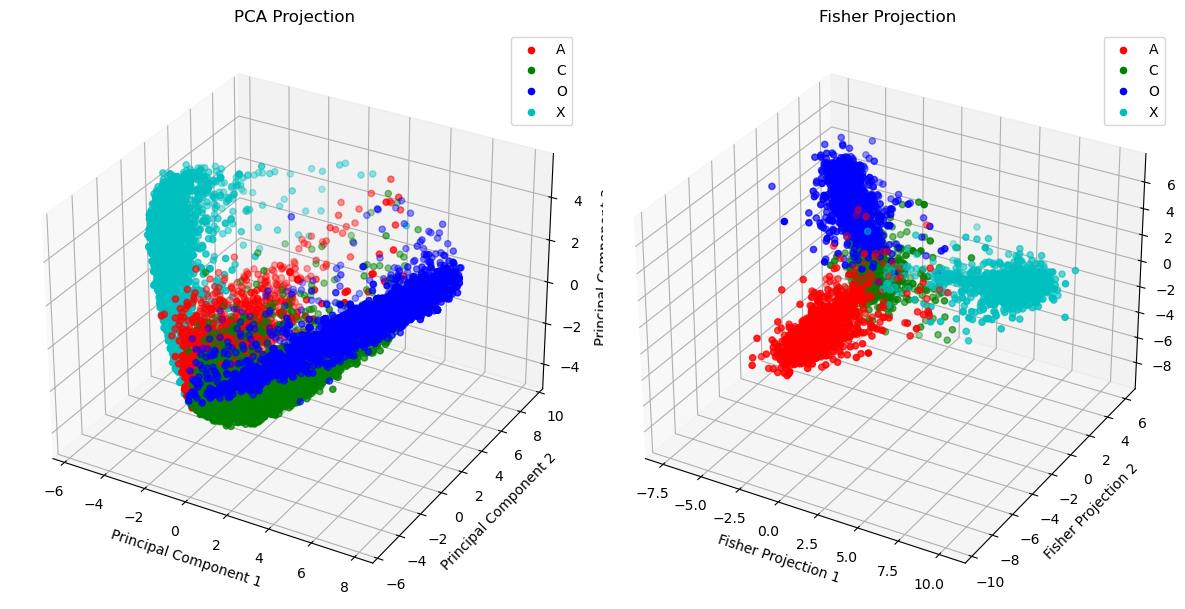

In [16]:
pca_vs_fisher_3d(X_train, ['A', 'C', 'O', 'X'])

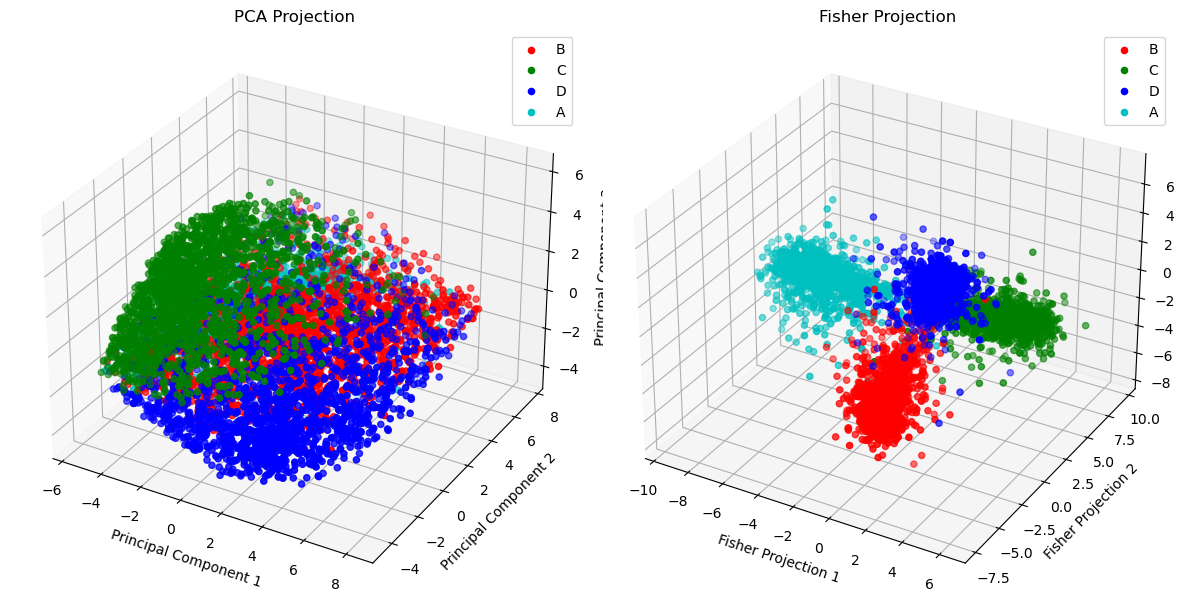

In [17]:
pca_vs_fisher_3d(X_train, ['B', 'C', 'D', 'A'])

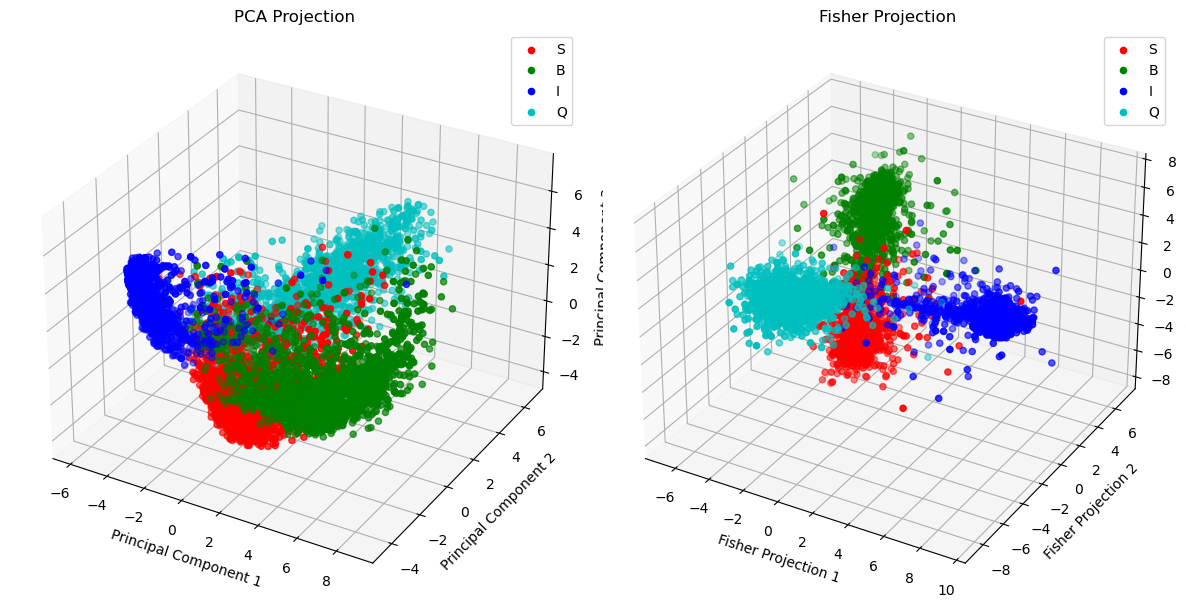

In [18]:
pca_vs_fisher_3d(X_train, ['S', 'B', 'I', 'Q'])

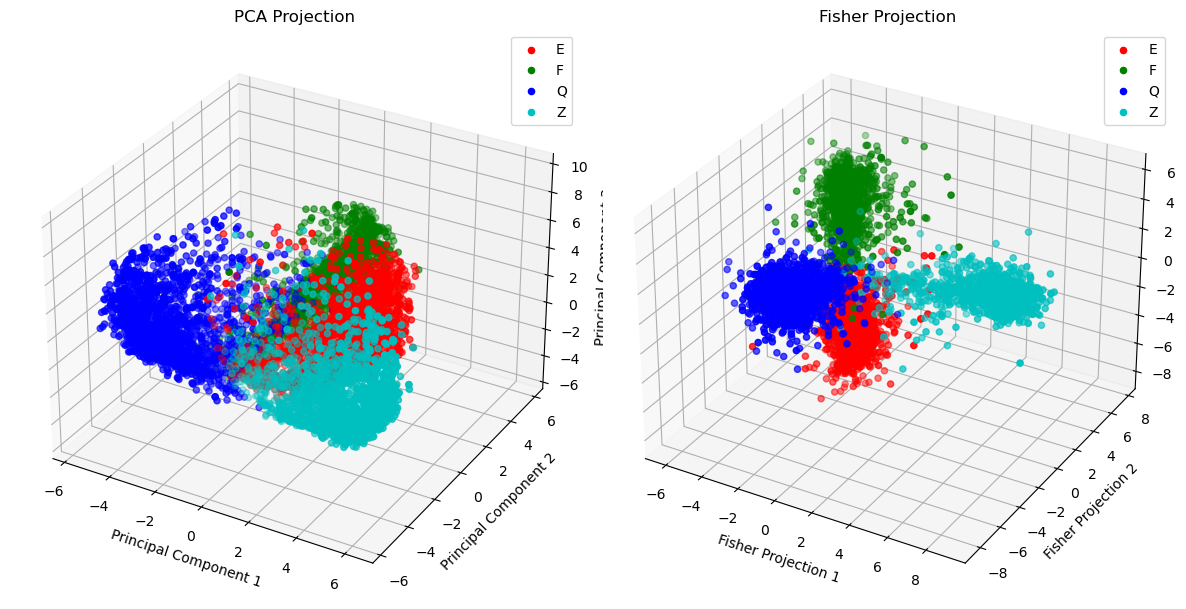

In [19]:
pca_vs_fisher_3d(X_train, ['E', 'F', 'Q', 'Z'])

Summary:
- In the above scatter plot,we observe how well the classes are separated in the reduced dimensional space.
- Effective separation between clusters implies good discriminant power of the projection method.Here Fisher Projection gives better insights into the structure, separation and distribution of the data than PCA Projection.

### PROBLEM 2

In [34]:
def compute_fisher_distances(X_train):
    
    unique_classes = y_train.unique()
    #unique_classes = ['A','B','C','D','E','F','G','H','I','J','K','L']
    num_classes = len(unique_classes)
    
    fisher_matrix = np.zeros((num_classes, num_classes))
    fisher_values = []
    

    for i in range(num_classes):
        for j in range(i+1, num_classes):
            class_i = unique_classes[i]
            class_j = unique_classes[j]
            
            # Select data for current pair of classes
            class_i_index = y_train[y_train == class_i].index
            class_j_index = y_train[y_train == class_j].index
   
            data_i = X_train.loc[class_i_index]
            data_j = X_train.loc[class_j_index]

            # Compute Fisher Discriminant
            lda = LDA()
            lda.fit(pd.concat([data_i, data_j]), [class_i] * len(data_i) + [class_j] * len(data_j))
            fisher_value = lda.score(pd.concat([data_i, data_j]), [class_i] * len(data_i) + [class_j] * len(data_j))
            
            fisher_matrix[i, j] = fisher_matrix[j, i] = fisher_value

            
            fisher_values.append((class_i, class_j, fisher_value))
            
    df = pd.DataFrame(fisher_values, columns=['Class 1', 'Class 2', 'Fisher Value'])
    return df, fisher_matrix
    
    # Save to CSV
df.to_csv('fisher_scores.csv', index=False)

    
   

In [35]:
df.head()

,Class 1,Class 2,Fisher Value
0,D,F,0.997762
1,D,J,0.998011
2,D,H,0.998260
3,D,A,0.999503
4,D,G,0.994779


In [36]:
# Compute Fisher distances
df, fisher_matrix = compute_fisher_distances(X_train)

In [37]:
fisher_matrix

array([[0.        , 0.99776231, 0.99801094, 0.99825957, 0.99950273,
        0.99477872, 0.9985082 , 0.99676778, 0.99627051, 0.99627051,
        0.99627051, 0.99651914, 0.99751367, 0.99801094, 0.99726504,
        0.99801094, 0.9985082 , 0.99353555, 0.9985082 , 0.99726504,
        0.99403282, 0.98533068, 0.99751367, 0.99676778, 0.99378419,
        0.99950273],
       [0.99776231, 0.        , 0.99477872, 0.99651914, 0.99726504,
        0.99726504, 0.99776231, 0.99875684, 0.99129786, 0.99602188,
        0.99651914, 0.99527598, 0.99751367, 0.9992541 , 0.99726504,
        0.99776231, 0.99726504, 0.99701641, 0.99776231, 0.9985082 ,
        0.99825957, 0.9985082 , 0.99776231, 0.99875684, 0.99676778,
        0.99875684],
       [0.99801094, 0.99477872, 0.        , 0.99751367, 0.99801094,
        0.99676778, 0.99801094, 0.99676778, 0.99701641, 0.99651914,
        0.98334162, 0.99602188, 0.99477872, 0.99875684, 0.99776231,
        0.99776231, 0.9985082 , 0.99477872, 0.99875684, 0.99950273,
      

In [38]:
# Step 2: Use MDS for visualization
def visualize_classes(fisher_matrix):
    
    
    unique_classes = y_train.unique()
    #unique_classes = ['A','B','C','D','E','F','G','H','I','J','K','L']
    
    num_matrix = len(fisher_matrix)
    fisher_matrix_final = []
    fisher_matrix_upd = [0]*num_matrix
    
    for i_list in fisher_matrix:
        for n,j in enumerate(i_list):
            if j == 0:
                j = 0.0000001
            fisher_matrix_upd[n] = j
        fisher_matrix_final.append(fisher_matrix_upd[:])
    
    mds = MDS(n_components=2, dissimilarity='precomputed', metric = False,normalized_stress='auto')
    embedded_coords = mds.fit_transform(1 / np.array(fisher_matrix_final))

    # Plot the classes on 2D plane
    plt.figure(figsize=(10, 8))
    plt.scatter(embedded_coords[:, 0], embedded_coords[:, 1], c='b', marker='o')

    for i, txt in enumerate(unique_classes):
        plt.annotate(txt, (embedded_coords[i, 0], embedded_coords[i, 1]), xytext=(5, 2), textcoords='offset points')

    plt.title('MDS Visualization of Classes based on Fisher Distance')
    plt.xlabel('MDS Dimension 1')
    plt.ylabel('MDS Dimension 2')
    plt.grid(True)
    plt.show()

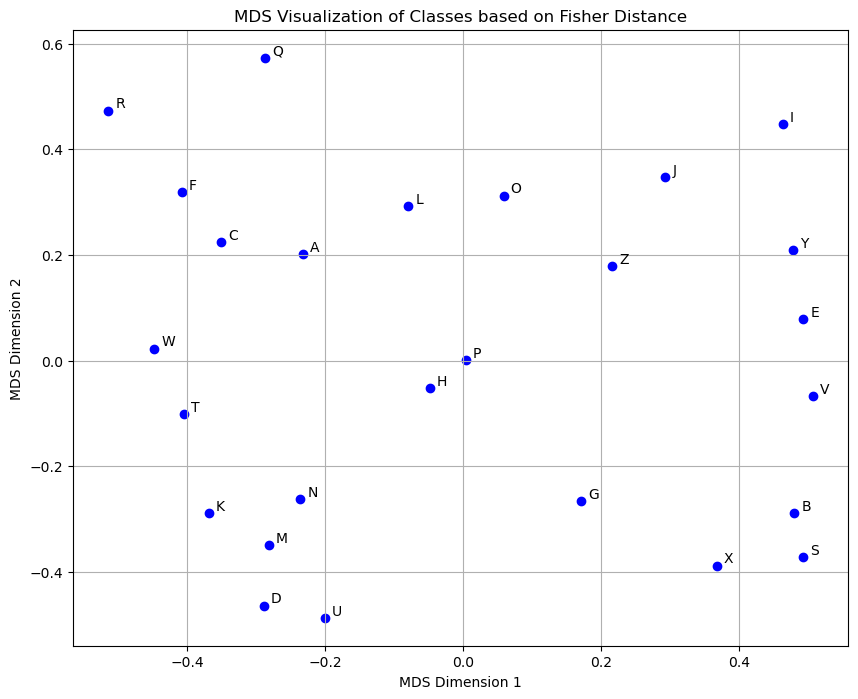

In [39]:
visualize_classes(fisher_matrix)

Summary:

Fisher distance is a measure of the discriminative power between classes. When the Fisher distance between two classes is small, it indicates that the classes are similar in terms of their discriminant characteristics. Conversely, when the Fisher distance is large, it suggests that the classes are more distinct and separable.

Also, when two classes have a smaller Fisher distance, it indicates that the information content or the structure of two probability distributions is similar. Here we can see that B and S are closer than B and A and hence, B and S would have similar structures for probability distributions.


### PROBLEM 3

In [60]:
def project_fisher(X_train, X_test, y_train, y_test, num_components=25):
    lda = LDA(n_components=num_components)
    lda.fit(X_train, y_train)
    train_projected = lda.transform(X_train)
    test_projected = lda.transform(X_test)
    return train_projected, test_projected

In [61]:
train_projected, test_projected = project_fisher(X_train, X_test, y_train, y_test)

In [62]:
train_projected

array([[-2.04953151, -2.28172469,  0.14988489, ..., -0.62164764,
        -0.1622302 , -0.98189059],
       [-1.9779134 , -2.7363335 ,  0.65933296, ...,  1.48841083,
        -0.33739937, -1.55467338],
       [-0.85953713, -1.50944827,  0.34263113, ..., -1.27469168,
         0.42696113,  0.10390652],
       ...,
       [-1.6245296 ,  2.48100511, -6.03922993, ...,  0.42554562,
        -0.64498583,  0.08886234],
       [-1.25350777,  1.58916268, -4.68007024, ...,  1.46926609,
         0.43280174, -0.41703952],
       [-2.20582265,  3.10883311, -7.50658658, ..., -2.37536758,
         2.01626793, -1.10164384]])

In [63]:
# Step 2 and 3: Implement knn_sweep function
def knn_sweep(train, test, K=[1, 3, 5, 7, 9, 11, 13, 15, 17]):
    knn_results = []
    
    
    y_train_k = y_train.reset_index()['labels']
    y_test_k = y_test.reset_index()['labels']

    for k in K:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train, y_train_k)
        train_pred = knn.predict(train)
        test_pred = knn.predict(test)
        train_accuracy = accuracy_score(y_train_k, train_pred)
        test_accuracy = accuracy_score(y_test_k, test_pred)

        knn_results.append([k, train_accuracy, test_accuracy])

      # Save results to CSV file
    pd.DataFrame(knn_results, columns=['k-value', 'Train Accuracy', 'Test Accuracy']).to_csv('Knn.csv', index=False)

    # Plot train and test accuracies
    knn_results = np.array(knn_results)
    plt.plot(knn_results[:, 0], knn_results[:, 1], label='Train Accuracy')
    plt.plot(knn_results[:, 0], knn_results[:, 2], label='Test Accuracy')
    plt.xlabel('k-value')
    plt.ylabel('Accuracy')
    plt.title('kNN Accuracy vs. k-value')
    plt.legend()
    plt.show()
    
    return knn_results

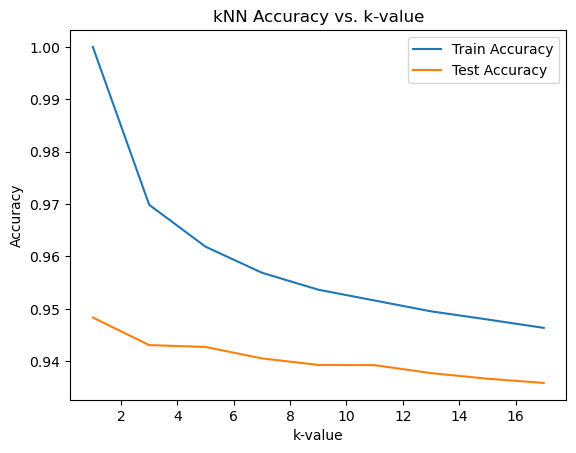

array([[ 1.        ,  0.99998087,  0.94834655],
       [ 3.        ,  0.96985809,  0.94308762],
       [ 5.        ,  0.9618636 ,  0.94273108],
       [ 7.        ,  0.95689095,  0.94054729],
       [ 9.        ,  0.95365872,  0.9392994 ],
       [11.        ,  0.95159316,  0.93925484],
       [13.        ,  0.9495276 ,  0.93773955],
       [15.        ,  0.94797843,  0.93666993],
       [17.        ,  0.94637188,  0.93586772]])

In [64]:
knn_sweep(train_projected, test_projected)

In [93]:
# Step 2 and 3: Implement parzen_sweep function

def parzen_sweep(train, test, sigma=[0.1, 0.5, 1, 1.5, 2, 3, 4, 6, 8, 10]):
    
    parzen_results = []
    classes = np.unique(y_train)
    class_indices = {label: index for index, label in enumerate(classes)}
    
    y_train_k = y_train.reset_index()['labels']
    y_test_k = y_test.reset_index()['labels']

    for s in sigma:
        # Parzen Window classifier with Gaussian kernel
        parzen_models = {}
        for class_label in classes:
            parzen = KernelDensity(bandwidth=s)
            parzen.fit(train[y_train_k == class_label])
            parzen_models[class_label] = parzen
            
        # Compute the KDE score for each class and choose the class with the highest score
        train_scores = np.vstack([parzen_models[class_label].score_samples(train) for class_label in classes]).T
        test_scores = np.vstack([parzen_models[class_label].score_samples(test) for class_label in classes]).T

        # Exponentiate log scores to get actual density values
        train_scores_exp = np.exp(train_scores)
        test_scores_exp = np.exp(test_scores)

        # Get the predictions based on the highest density value
        train_pred = np.array([classes[i] for i in np.argmax(train_scores_exp, axis=1)])
        test_pred = np.array([classes[i] for i in np.argmax(test_scores_exp, axis=1)])
            
        
        
        train_accuracy = accuracy_score(y_train_k, train_pred)
        test_accuracy = accuracy_score(y_test_k, test_pred)
       
        parzen_results.append([s, train_accuracy, test_accuracy])
        
     # Save results to CSV file
    pd.DataFrame(parzen_results, columns=['Sigma-value', 'Train Accuracy', 'Test Accuracy']).to_csv('Parzen.csv', index=False)

    # Plot train and test accuracies
    parzen_results = np.array(parzen_results)
    plt.plot(parzen_results[:, 0], parzen_results[:, 1], label='Train Accuracy')
    plt.plot(parzen_results[:, 0], parzen_results[:, 2], label='Test Accuracy')
    plt.xlabel('Sigma-value')
    plt.ylabel('Accuracy')
    plt.title('Parzen Window Accuracy vs. Sigma-value')
    plt.legend()
    plt.show()

    return parzen_results

In [ ]:
# Perform parameter sweep for Parzen Window classifier

parzen_train_accuracies, parzen_test_accuracies = parzen_sweep(train_projected, test_projected)
parzen_train_accuracies = results[0]
parzen_test_accuracies = results[1]

Summary:
- For kNN Classifier: If k-value too large, the model might generalize too much and ignore important patterns in the data, resulting in lower accuracy. Hence, we see a fall in the graph. 

- For Parzen Window Classifier : The optimal value of sigma depends on the distribution of the data. For some datasets, a smaller sigma is suitable and for others a larger sigma value might work better. For the above plot of Parzen window accuracy, we see that sigma=1.5 aligns well with the data distribution- leading to a huge jump. 

- In both the above plots, we can also see that accuracy is more for training dataset than test dataset.



### PROBLEM 4

In [84]:
def perceptron_model(train, test, classes=['A', 'C'], runs=100):
    perceptron_results = []
    
    y_train_reindexed = y_train.reset_index()
    y_test_reindexed = y_test.reset_index()
    
    train_accuracies = []
    test_accuracies = []

    for run in range(1, runs+1):
       

        # Select data for the current class
        index_y_train_reindexed = y_train_reindexed[y_train_reindexed['labels'].isin(classes)].index
        index_y_test_reindexed = y_test_reindexed[y_test_reindexed['labels'].isin(classes)].index
            
        train_class = train[index_y_train_reindexed]
        test_class = test[index_y_test_reindexed]
        y_train_class = y_train_reindexed.iloc[index_y_train_reindexed]
        y_test_class = y_test_reindexed.iloc[index_y_test_reindexed]

    

        # Extract features and labels
        X_train_p = train_class
        y_train_p = y_train_class['labels']
        X_test_p = test_class
        y_test_p = y_test_class['labels']

            # Initialize and train the perceptron model
        perceptron = Perceptron(random_state=run)
        perceptron.fit(X_train_p, y_train_p)

            # Calculate training and testing accuracies
        train_accuracy = accuracy_score(y_train_p, perceptron.predict(X_train_p))
        test_accuracy = accuracy_score(y_test_p, perceptron.predict(X_test_p))

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Append results for the current run
        perceptron_results.append([run, train_accuracy, test_accuracy])

    # Save results to CSV file
    pd.DataFrame(perceptron_results, columns=['Run', 'Train Accuracy', 'Test Accuracy']).to_csv('perceptron_A_C.csv', index=False)

    avg_train_accuracy = np.mean(train_accuracies)
    avg_test_accuracy = np.mean(test_accuracies)
    
    return perceptron_results, avg_train_accuracy,avg_test_accuracy

In [85]:
perceptron_results, avg_train_accuracy_p,avg_test_accuracy_p = perceptron_model(train_projected, test_projected)

In [86]:
perceptron_results

[[1, 0.9942814520139234, 0.9936268829663963],
 [2, 0.9935355544505221, 0.9913093858632677],
 [3, 0.9950273495773247, 0.9918887601390498],
 [4, 0.9937841869716559, 0.992468134414832],
 [5, 0.9940328194927897, 0.9901506373117034],
 [6, 0.9942814520139234, 0.9918887601390498],
 [7, 0.9932869219293884, 0.9918887601390498],
 [8, 0.9947787170561909, 0.9918887601390498],
 [9, 0.9940328194927897, 0.9907300115874855],
 [10, 0.9940328194927897, 0.9901506373117034],
 [11, 0.9937841869716559, 0.9918887601390498],
 [12, 0.9947787170561909, 0.9930475086906141],
 [13, 0.9947787170561909, 0.9913093858632677],
 [14, 0.9952759820984585, 0.992468134414832],
 [15, 0.9925410243659871, 0.9907300115874855],
 [16, 0.9935355544505221, 0.9901506373117034],
 [17, 0.9937841869716559, 0.9889918887601391],
 [18, 0.991546494281452, 0.9884125144843569],
 [19, 0.9945300845350572, 0.992468134414832],
 [20, 0.995773247140726, 0.9884125144843569],
 [21, 0.9925410243659871, 0.9889918887601391],
 [22, 0.9937841869716559, 0

In [87]:
# Define function to train multiple logistic regression models
def logistic_model(train, test, classes=['A', 'C'], runs=100):
    logistic_results = []
    
     
    y_train_reindexed = y_train.reset_index()
    y_test_reindexed = y_test.reset_index()
    
    train_accuracies = []
    test_accuracies = []
    
    for run in range(1, runs+1):
      

        # Select data for the current class
        index_y_train_reindexed = y_train_reindexed[y_train_reindexed['labels'].isin(classes)].index
        index_y_test_reindexed = y_test_reindexed[y_test_reindexed['labels'].isin(classes)].index
            
        train_class = train[index_y_train_reindexed]
        test_class = test[index_y_test_reindexed]
        y_train_class = y_train_reindexed.iloc[index_y_train_reindexed]
        y_test_class = y_test_reindexed.iloc[index_y_test_reindexed]
        



        # Extract features and labels
        X_train_l = train_class
        y_train_l = y_train_class['labels']
        X_test_l = test_class
        y_test_l = y_test_class['labels']

            # Initialize and train the logistic regression model
        logistic = LogisticRegression(random_state=run)
        logistic.fit(X_train_l, y_train_l)

            # Calculate training and testing accuracies
        train_accuracy = accuracy_score(y_train_l, logistic.predict(X_train_l))
        test_accuracy = accuracy_score(y_test_l, logistic.predict(X_test_l))

        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)

        # Append results for the current run
        logistic_results.append([run, train_accuracy, test_accuracy])

    # Save results to CSV file
    pd.DataFrame(logistic_results, columns=['Run', 'Train Accuracy', 'Test Accuracy']).to_csv('logistic_A_C.csv', index=False)
    
      # Calculate average accuracies
    avg_train_accuracy = np.mean(train_accuracies)
    avg_test_accuracy = np.mean(test_accuracies)

    return logistic_results, avg_train_accuracy, avg_test_accuracy

In [88]:
logistic_results, avg_train_accuracy_l, avg_test_accuracy_l = logistic_model(train_projected, test_projected)

In [89]:
logistic_results

[[1, 0.9962705121829936, 0.9930475086906141],
 [2, 0.9962705121829936, 0.9930475086906141],
 [3, 0.9962705121829936, 0.9930475086906141],
 [4, 0.9962705121829936, 0.9930475086906141],
 [5, 0.9962705121829936, 0.9930475086906141],
 [6, 0.9962705121829936, 0.9930475086906141],
 [7, 0.9962705121829936, 0.9930475086906141],
 [8, 0.9962705121829936, 0.9930475086906141],
 [9, 0.9962705121829936, 0.9930475086906141],
 [10, 0.9962705121829936, 0.9930475086906141],
 [11, 0.9962705121829936, 0.9930475086906141],
 [12, 0.9962705121829936, 0.9930475086906141],
 [13, 0.9962705121829936, 0.9930475086906141],
 [14, 0.9962705121829936, 0.9930475086906141],
 [15, 0.9962705121829936, 0.9930475086906141],
 [16, 0.9962705121829936, 0.9930475086906141],
 [17, 0.9962705121829936, 0.9930475086906141],
 [18, 0.9962705121829936, 0.9930475086906141],
 [19, 0.9962705121829936, 0.9930475086906141],
 [20, 0.9962705121829936, 0.9930475086906141],
 [21, 0.9962705121829936, 0.9930475086906141],
 [22, 0.99627051218299

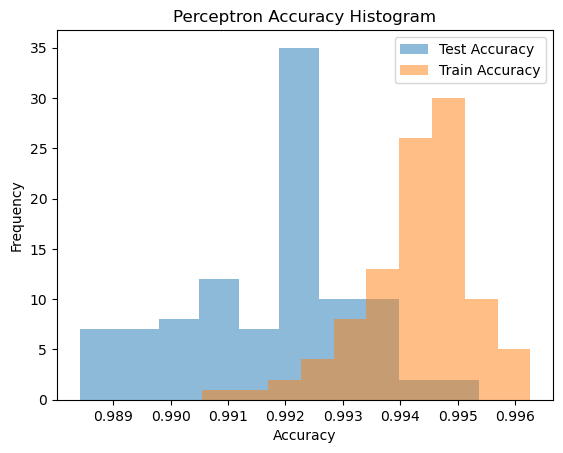

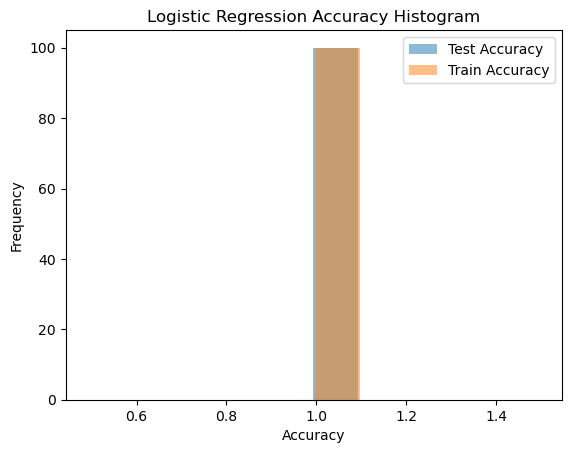

In [90]:
def plot_histogram(results, model_name):
    plt.hist([result[2] for result in results], bins=10, alpha=0.5, label='Test Accuracy')
    plt.hist([result[1] for result in results], bins=10, alpha=0.5, label='Train Accuracy')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.title(f'{model_name} Accuracy Histogram')
    plt.legend()
    plt.show()

plot_histogram(perceptron_results, 'Perceptron')
plot_histogram(logistic_results, 'Logistic Regression')

In [92]:
print('The average mean accuracy for Preceptron for train is: ', avg_train_accuracy_p, ' and for test is: ', avg_test_accuracy_p)
print('The average mean accuracy for Logistic Regression for train is: ', avg_train_accuracy_l, ' and for test is: ', avg_test_accuracy_l)

The average mean accuracy for Preceptron for train is:  0.9943262058677275  and for test is:  0.9916628041714947
The average mean accuracy for Logistic Regression for train is:  0.9962705121829935  and for test is:  0.9930475086906138


Summary:
- For perceptron model, we see that for 100 random initilizations,accuracy is more for training data than the test data.
- For logistic model, irrespective of random initilizations, accuracy remains approximately same for training and test dataset.